In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output = np.load('/home/spencer/research/radar-rgb-bfs/NN/baseline/l8_baseline_side_output.npy')
L = output[:,0]
S = output[:,1]
print(L.shape)
radar = np.load('/home/spencer/research/radar-rgb-bfs/NN/radar/radar_frames_csl_side_0_likelihood.npy')[:30]

(30, 180, 320)


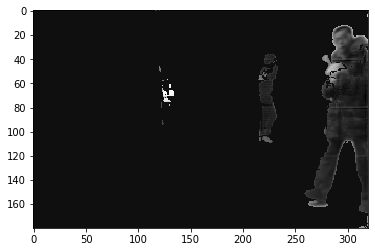

In [3]:
n = 15
plt.imshow((np.abs(S[n])>.05)*(L[n]+S[n]),aspect='auto',cmap='gray')

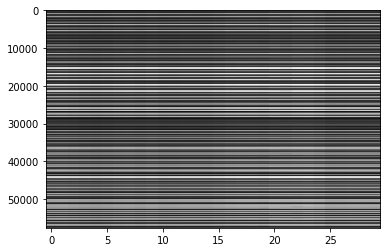

In [4]:
plt.imshow(L.reshape(30,-1).T,aspect='auto',cmap='gray')

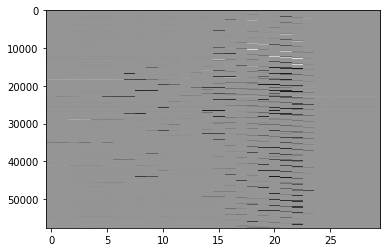

In [5]:
# plt.figure(figsize=(20,20))
plt.imshow(S.reshape(30,-1).T,aspect='auto',cmap='gray')

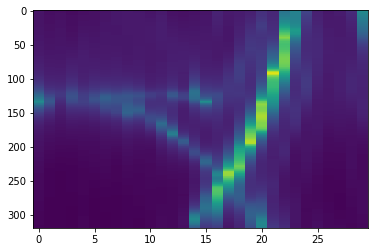

In [6]:
M_F = radar[:,::4]
M_F = M_F[:, :, np.newaxis] * np.ones((L.shape[0], L.shape[2], L.shape[1]))
M_F = np.swapaxes(M_F, 1, 2).reshape(L.shape[0], -1)
M_F = M_F.T
# M_F /= np.max(M_F)

# plt.figure(figsize=(20,20))
plt.imshow(M_F[:320],aspect='auto')

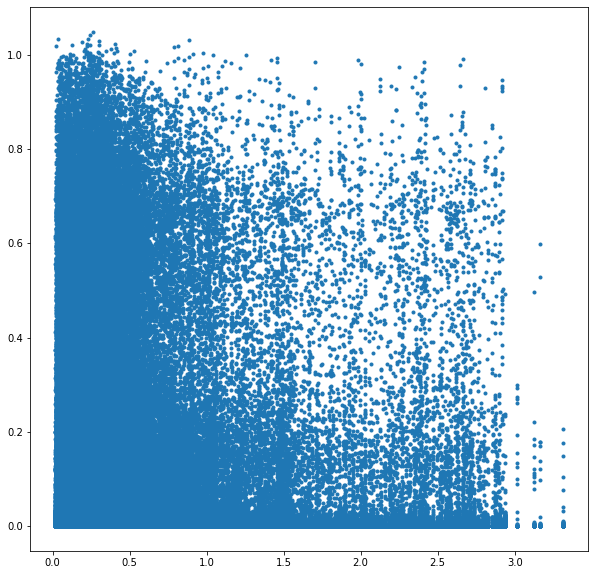

In [7]:
plt.figure(figsize=(10,10))
x = M_F.flatten()
y = np.abs(S).flatten()
plt.plot(x,y,'.')
plt.show()

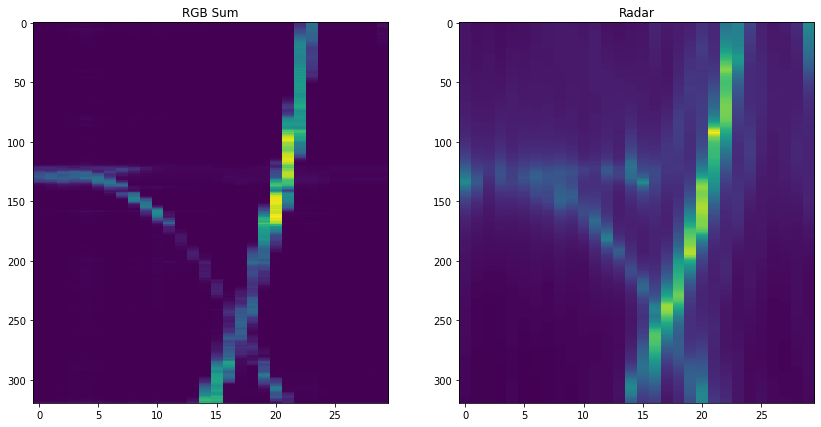

In [14]:
S_rows = np.sum(np.abs(S),1)
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('RGB Sum')
plt.imshow(S_rows.T,aspect='auto')
plt.subplot(122)
plt.title('Radar')
plt.imshow(radar[:,::4].T,aspect='auto')

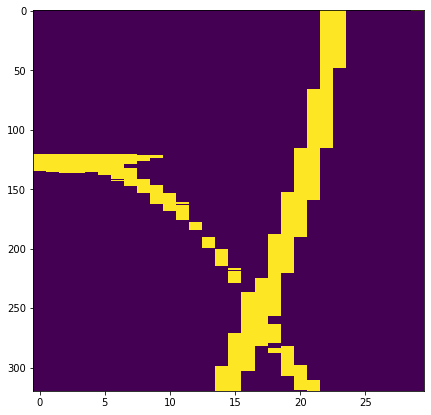

In [48]:
plt.figure(figsize=(7,7))
sum_of_arrays = np.array(.5*(radar[:,::4].T+radar[:,::-4].T)/np.max(radar[:,::4])>.05,dtype=bool) * \
    np.array(S_rows.T/np.max(S_rows)>.05,dtype=bool)
plt.imshow(sum_of_arrays ,aspect='auto')

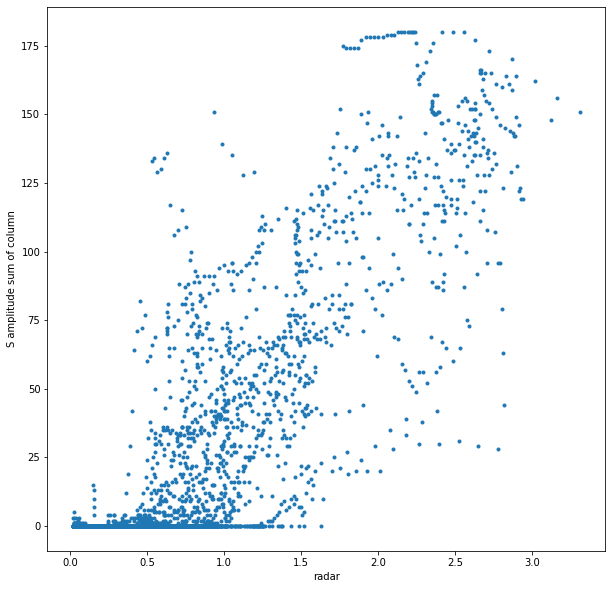

In [142]:
plt.figure(figsize=(10,10))
x = radar[:,::4].flatten()
plt.xlabel('radar')
y = S_rows.flatten()
plt.ylabel('S amplitude sum of column')
plt.plot(x,y,'.')
plt.show()